In [73]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [74]:
#load the data
oecd_bill = pd.read_csv('data/BLI_30092020203552353.csv')
gdp_per_capita = pd.read_csv('data/WEO_Data.xls', delimiter = '\t', encoding = 'latin1', na_values = 'n/a')

In [75]:
oecd_bill.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [76]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


In [77]:
gdp_per_capita.tail()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,088.344",2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,302.940",2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,350.151",2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,064.350",2012.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
new_df = oecd_bill[['Country', 'Value']]
new_df.head()

,Country,Value
0,Australia,5.4
1,Austria,3.5
2,Belgium,3.7
3,Canada,6.0
4,Czech Republic,3.1


In [79]:
new_df1 = gdp_per_capita[['Country', '2015']]
new_df1.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,"3,995.383"
2,Algeria,"4,318.135"
3,Angola,"4,100.315"
4,Antigua and Barbuda,"14,414.302"


In [102]:
country = []
value = []
gdp = []
for i in range(len(new_df)):
    for j in range(len(new_df1)):
        if new_df['Country'][i] == new_df1['Country'][j] and new_df['Value'][i] <= 7.6 :
            country.append(new_df['Country'][i])
            value.append(new_df['Value'][i])
            gdp.append(new_df1['2015'][j])

In [103]:
gdp = [float(x.replace(",", '')) for x in gdp]
value = [float(x) for x in value]

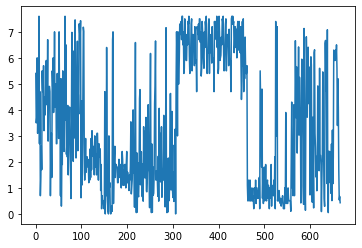

In [104]:
plt.plot(value)

In [105]:
max(value)

7.6

In [106]:
data = {
    'Country':country,
    'gdp':gdp,
    'Value':value
}

In [107]:
df = pd.DataFrame(data)

In [108]:
df.head()

,Country,gdp,Value
0,Australia,50961.865,5.4
1,Austria,43724.031,3.5
2,Belgium,40106.632,3.7
3,Canada,43331.961,6.0
4,Czech Republic,17256.918,3.1


In [109]:
x = np.c_[df['gdp']]
y = np.c_[df['Value']]

<AxesSubplot:xlabel='gdp', ylabel='Value'>

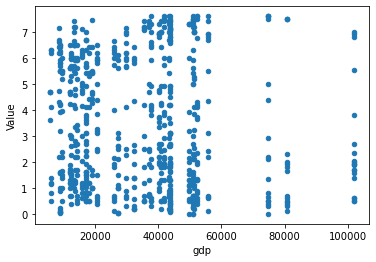

In [110]:
df.plot(kind = 'scatter', x= 'gdp', y = 'Value')

In [111]:
lin_reg = LinearRegression()

In [112]:
lin_reg.fit(x,y)

LinearRegression()

In [114]:
x_new = [[50961]]
print(lin_reg.predict(x_new))

[[3.27371447]]


In [115]:
from sklearn import neighbors

In [116]:
clf = neighbors.KNeighborsRegressor(n_neighbors=3)

In [117]:
clf.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

In [119]:
x_new = [[50961]]
print(clf.predict(x_new))

[[4.6]]


## Pycaret Testing

In [150]:
df.shape
data

,Country,gdp,Value
0,Netherlands,43603.115,4.80
1,France,37675.006,6.50
2,Luxembourg,101994.093,1.40
3,Germany,40996.511,0.50
4,Israel,35343.336,0.48
...,...,...,...
595,Korea,27195.197,2.10
596,Israel,35343.336,0.49
597,Slovenia,20732.482,2.41
598,Lithuania,14210.280,2.18


In [121]:
data = df.sample(frac = 0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (600, 3)
Unseen Data For Predictions: (67, 3)


In [122]:
from pycaret.regression import *

In [123]:
exp_reg01 = setup(data = data, target='Value', session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(600, 3)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [124]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Lasso Regression,2.2392,6.1971,2.4869,-0.0060,0.6549,2.5079,0.0042
1,Elastic Net,2.2392,6.1971,2.4869,-0.0060,0.6549,2.5079,0.0041
2,Bayesian Ridge,2.2392,6.1971,2.4869,-0.0060,0.6549,2.5079,0.0065
3,AdaBoost Regressor,2.2665,6.2288,2.4931,-0.0110,0.6662,2.6187,0.0197
4,Lasso Least Angle Regression,2.2789,6.2615,2.4999,-0.0162,0.6615,2.5537,0.0040
5,TheilSen Regressor,2.2396,6.4111,2.5289,-0.0406,0.6623,2.4602,0.7141
6,Light Gradient Boosting Machine,2.2428,6.5290,2.5516,-0.0601,0.6679,2.5034,0.0183
7,Orthogonal Matching Pursuit,2.2933,6.6342,2.5713,-0.0747,0.6763,2.5450,0.0048
8,Gradient Boosting Regressor,2.2612,6.6239,2.5706,-0.0761,0.6740,2.4746,0.0452
9,Ridge Regression,2.2512,6.6548,2.5765,-0.0813,0.6747,2.4718,0.0038


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [136]:
model1 = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8546,2.4196,0.0407,0.6527,1.9948
1,2.2820,6.4725,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8095,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3657
4,2.0427,5.1605,2.2717,0.0292,0.5893,1.3132
5,2.1820,6.3070,2.5114,0.0138,0.6552,4.2072
6,2.0197,5.6541,2.3778,-0.0579,0.5562,1.0750
7,2.2975,6.3314,2.5162,0.0436,0.7254,2.2040
8,2.1950,6.2372,2.4974,-0.0297,0.7237,4.0438
9,2.5024,7.1955,2.6824,-0.0061,0.7465,5.5585


In [127]:
print(model1)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


In [128]:
model2 = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8546,2.4196,0.0407,0.6527,1.9948
1,2.2820,6.4725,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8095,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3657
4,2.0426,5.1604,2.2717,0.0292,0.5893,1.3131
5,2.1820,6.3070,2.5114,0.0138,0.6552,4.2072
6,2.0197,5.6542,2.3778,-0.0579,0.5562,1.0750
7,2.2975,6.3314,2.5162,0.0436,0.7254,2.2039
8,2.1950,6.2372,2.4974,-0.0297,0.7237,4.0437
9,2.5024,7.1955,2.6824,-0.0061,0.7465,5.5585


In [130]:
print(model2)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)


In [131]:
model3 = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8546,2.4196,0.0407,0.6527,1.9948
1,2.2820,6.4725,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8095,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3657
4,2.0426,5.1604,2.2717,0.0292,0.5893,1.3131
5,2.1820,6.3070,2.5114,0.0138,0.6552,4.2072
6,2.0197,5.6542,2.3779,-0.0579,0.5562,1.0750
7,2.2975,6.3313,2.5162,0.0436,0.7254,2.2039
8,2.1950,6.2372,2.4974,-0.0297,0.7237,4.0437
9,2.5024,7.1955,2.6824,-0.0061,0.7465,5.5585


In [132]:
print(model3)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [133]:
tuned_model1 = tune_model(model1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8546,2.4196,0.0407,0.6527,1.9948
1,2.2820,6.4725,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8095,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3657
4,2.0427,5.1605,2.2717,0.0292,0.5893,1.3132
5,2.1820,6.3070,2.5114,0.0138,0.6552,4.2072
6,2.0197,5.6541,2.3778,-0.0579,0.5562,1.0750
7,2.2975,6.3314,2.5162,0.0436,0.7254,2.2039
8,2.1950,6.2372,2.4974,-0.0297,0.7237,4.0437
9,2.5024,7.1955,2.6824,-0.0061,0.7465,5.5585


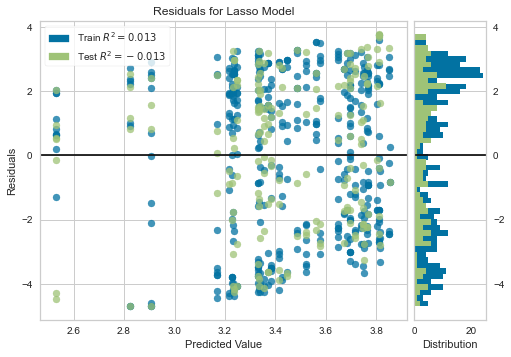

In [137]:
plot_model(tuned_model1)

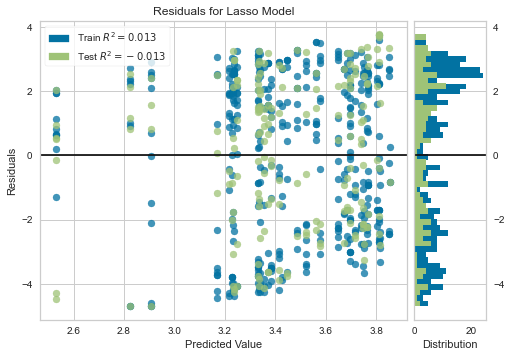

In [138]:
plot_model(model1)

In [139]:
tuned_model2 = tune_model(model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8546,2.4196,0.0407,0.6527,1.9948
1,2.2820,6.4725,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8095,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3657
4,2.0426,5.1604,2.2717,0.0292,0.5893,1.3131
5,2.1820,6.3070,2.5114,0.0138,0.6552,4.2072
6,2.0197,5.6542,2.3779,-0.0579,0.5562,1.0750
7,2.2975,6.3314,2.5162,0.0436,0.7254,2.2039
8,2.1950,6.2372,2.4974,-0.0297,0.7237,4.0437
9,2.5024,7.1955,2.6824,-0.0061,0.7465,5.5585


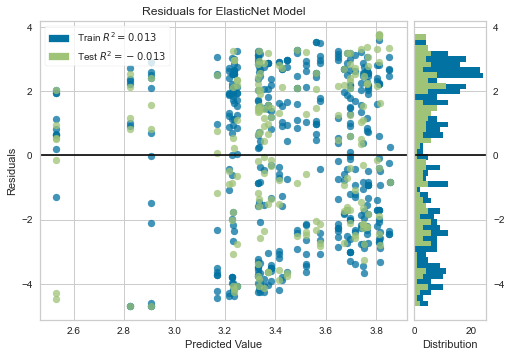

In [140]:
plot_model(tuned_model2)

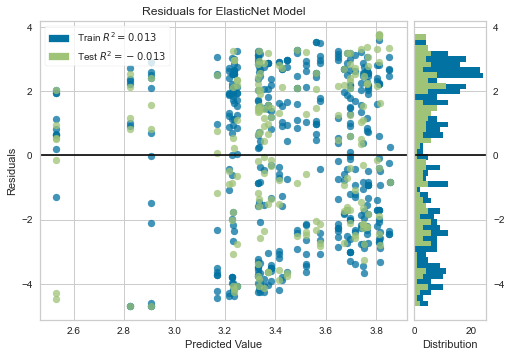

In [141]:
plot_model(model2)

In [142]:
tuned_model3 = tune_model(model3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1856,5.8544,2.4196,0.0407,0.6527,1.9947
1,2.2820,6.4726,2.5441,0.0063,0.6423,1.3503
2,2.4448,6.8094,2.6095,-0.0190,0.6790,1.9667
3,2.2401,5.9487,2.4390,-0.0807,0.5785,1.3658
4,2.0426,5.1605,2.2717,0.0291,0.5894,1.3132
5,2.1820,6.3069,2.5114,0.0139,0.6552,4.2070
6,2.0196,5.6540,2.3778,-0.0579,0.5562,1.0749
7,2.2975,6.3314,2.5162,0.0436,0.7254,2.2039
8,2.1950,6.2371,2.4974,-0.0297,0.7237,4.0438
9,2.5024,7.1956,2.6825,-0.0061,0.7465,5.5586


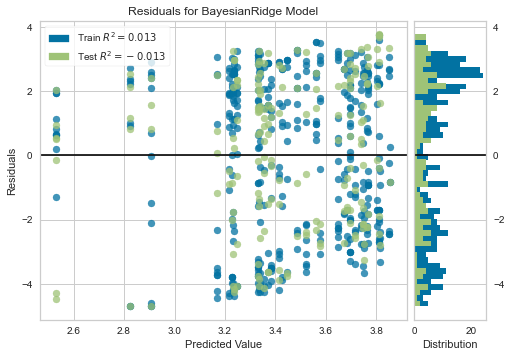

In [143]:
plot_model(model3)

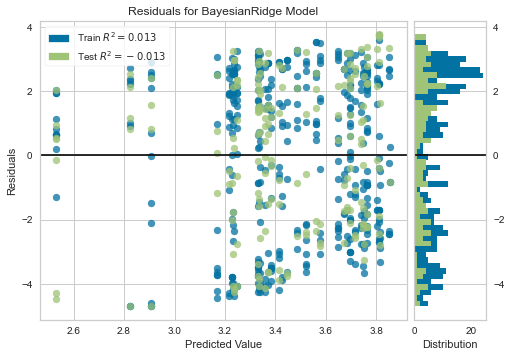

In [144]:
plot_model(tuned_model3)

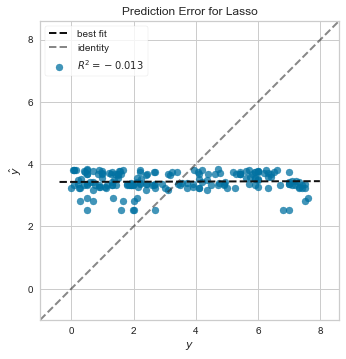

In [145]:
plot_model(tuned_model1, plot= 'error')

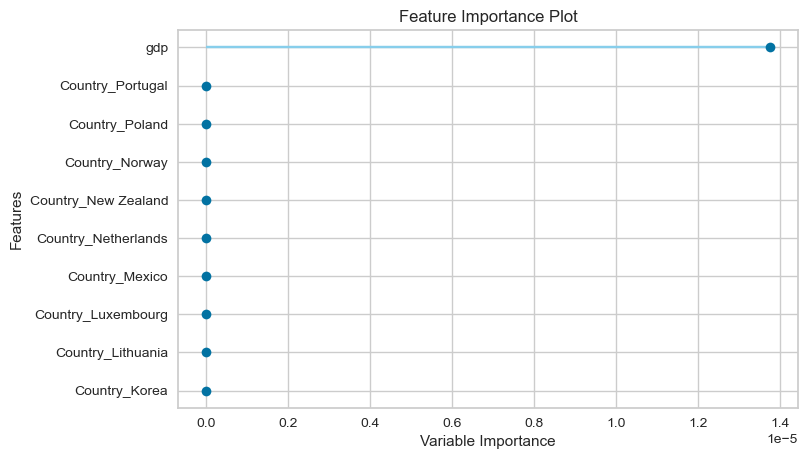

In [147]:
plot_model(tuned_model1, plot='feature')

In [148]:
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [149]:
predict_model(tuned_model1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso,2.0587,5.4897,2.343,-0.0129,0.6418,2.8674


,gdp,Country_Australia,Country_Austria,Country_Belgium,Country_Brazil,Country_Canada,Country_Chile,Country_Colombia,Country_Czech Republic,Country_Denmark,...,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_United Kingdom,Country_United States,Value,Label
0,17256.918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,3.6968
1,101994.093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.99,2.5314
2,14210.280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.69,3.7387
3,19121.592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.61,3.6712
4,43603.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,3.3345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,17288.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.40,3.6964
177,50961.865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.30,3.2333
178,43331.961,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.80,3.3382
179,14210.280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.20,3.7387
